In [1]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [2]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [3]:
dataset = df.values
X = dataset[:,0:10]
Y = dataset[:,10]

In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
#scales the input feature between 0 and 1

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Using TensorFlow backend.


In [8]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#algorithm -stochastic gradient descent
# binary classification - binary crossentropy
# metrics -loss as well as accuracy

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 763us/step - loss: 0.6927 - accuracy: 0.5382 - val_loss: 0.6745 - val_accuracy: 0.6758
Epoch 2/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.6689 - accuracy: 0.7329 - val_loss: 0.6617 - val_accuracy: 0.6849
Epoch 3/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6554 - accuracy: 0.7172 - val_loss: 0.6531 - val_accuracy: 0.6530
Epoch 4/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6451 - accuracy: 0.6663 - val_loss: 0.6447 - val_accuracy: 0.6712
Epoch 5/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6357 - accuracy: 0.7231 - val_loss: 0.6365 - val_accuracy: 0.6804
Epoch 6/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6266 - accuracy: 0.7231 - val_loss: 0.6280 - val_accuracy: 0.7032
Epoch 7/100
1022/1022 [==============================] - 0s 49us/step - los

Epoch 55/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.3008 - accuracy: 0.8767 - val_loss: 0.3462 - val_accuracy: 0.8539
Epoch 56/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.2981 - accuracy: 0.8806 - val_loss: 0.3445 - val_accuracy: 0.8493
Epoch 57/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.2966 - accuracy: 0.8787 - val_loss: 0.3436 - val_accuracy: 0.8493
Epoch 58/100
1022/1022 [==============================] - 0s 29us/step - loss: 0.2943 - accuracy: 0.8787 - val_loss: 0.3428 - val_accuracy: 0.8447
Epoch 59/100
1022/1022 [==============================] - 0s 78us/step - loss: 0.2932 - accuracy: 0.8806 - val_loss: 0.3425 - val_accuracy: 0.8447
Epoch 60/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.2906 - accuracy: 0.8806 - val_loss: 0.3462 - val_accuracy: 0.8447
Epoch 61/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.2894 - accuracy: 0.8816 - val_loss: 0

In [10]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 47us/step


0.8858447670936584

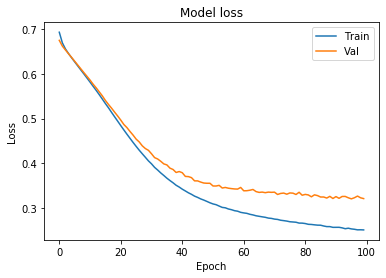

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

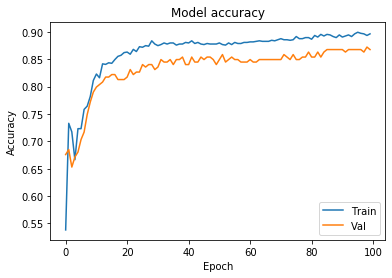

In [12]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [13]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))
#model we we are overfitting

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4963 - accuracy: 0.7916 - val_loss: 0.4265 - val_accuracy: 0.8174
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3183 - accuracy: 0.8708 - val_loss: 0.3672 - val_accuracy: 0.8721
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2891 - accuracy: 0.8757 - val_loss: 0.3973 - val_accuracy: 0.8356
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2664 - accuracy: 0.8855 - val_loss: 0.3915 - val_accuracy: 0.8584
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2593 - accuracy: 0.8826 - val_loss: 0.3525 - val_accuracy: 0.8539
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2417 - accuracy: 0.8924 - val_loss: 0.3951 - val_accuracy: 0.8493
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2185

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1398 - accuracy: 0.9364 - val_loss: 0.3282 - val_accuracy: 0.8767
Epoch 58/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1351 - accuracy: 0.9413 - val_loss: 0.4572 - val_accuracy: 0.8630
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1362 - accuracy: 0.9423 - val_loss: 0.4459 - val_accuracy: 0.8676
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1295 - accuracy: 0.9452 - val_loss: 0.4507 - val_accuracy: 0.8904
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1427 - accuracy: 0.9364 - val_loss: 0.4923 - val_accuracy: 0.8676
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1723 - accuracy: 0.9237 - val_loss: 0.3949 - val_accuracy: 0.8858
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1456 - accuracy: 0.9393 - val_loss: 0.3754 -

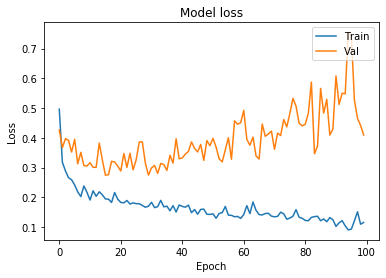

In [14]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

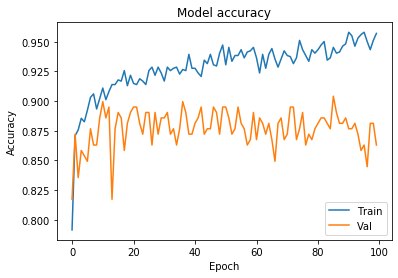

In [15]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [16]:
# adding regularization to model and dropout so to make it less overfitting
from keras.layers import Dropout
from keras import regularizers
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 14.2276 - accuracy: 0.6341 - val_loss: 3.9083 - val_accuracy: 0.7489
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6621 - accuracy: 0.8395 - val_loss: 0.6938 - val_accuracy: 0.8219
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.8767 - val_loss: 0.6322 - val_accuracy: 0.7991
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5063 - accuracy: 0.8679 - val_loss: 0.5452 - val_accuracy: 0.8402
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4830 - accuracy: 0.8767 - val_loss: 0.4876 - val_accuracy: 0.8813
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4667 - accuracy: 0.8826 - val_loss: 0.4865 - val_accuracy: 0.8767
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.452

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4251 - accuracy: 0.8855 - val_loss: 0.4975 - val_accuracy: 0.8493
Epoch 58/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4129 - accuracy: 0.8943 - val_loss: 0.4470 - val_accuracy: 0.8813
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4169 - accuracy: 0.8845 - val_loss: 0.4625 - val_accuracy: 0.8767
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4265 - accuracy: 0.8728 - val_loss: 0.4436 - val_accuracy: 0.8721
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4124 - accuracy: 0.8894 - val_loss: 0.4475 - val_accuracy: 0.8676
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4243 - accuracy: 0.8826 - val_loss: 0.4608 - val_accuracy: 0.8721
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4071 - accuracy: 0.8943 - val_loss: 0.4431 -

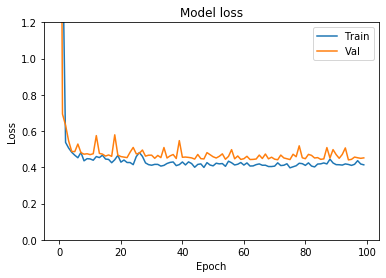

In [17]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

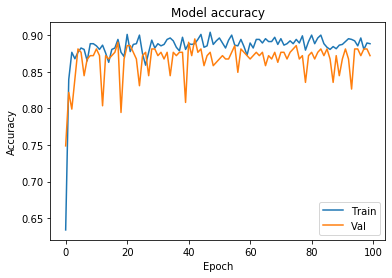

In [18]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()